# This notebook contains code to pml training dataset explained in video linked below. 

**This dataset was collected by scientists who conducted experiments by placing a tracking device to people and recording their activities or physicl measurements.**

link -- https://www.youtube.com/watch?v=yQsOFWqpjkE

In [12]:
# import dependencies

In [2]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

# visulaize the important characteristics of the dataset
import matplotlib.pyplot as plt

In [4]:
# step 1: download the data
dataframe_all = pd.read_csv("pml-training.csv")
num_rows = dataframe_all.shape[0]


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# step 2: remove useless data
# count the number of missing elements (NaN) in each column
counter_nan = dataframe_all.isnull().sum()
counter_without_nan = counter_nan[counter_nan==0]
# remove the columns with missing elements
dataframe_all = dataframe_all[counter_without_nan.keys()]
# remove the first 7 columns which contain no discriminative information which could help us to diffrentiate our classes.
dataframe_all = dataframe_all.ix[:,7:]
# the list of columns (the last column is the class label)
columns = dataframe_all.columns
print (columns)


Index(['roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y',
       'magnet_forea

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [7]:
# step 3: get features (x) and scale the features
# get x and convert it to numpy array
x = dataframe_all.ix[:,:-1].values
standard_scaler = StandardScaler()
x_std = standard_scaler.fit_transform(x)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
# step 4: get class labels y and then encode it into number 
# get class label data
y = dataframe_all.ix[:,-1].values
# encode the class label
class_labels = np.unique(y)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [9]:
# step 5: split the data into training set and test set
test_percentage = 0.1
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = test_percentage, random_state = 0)

# t-distributed Stochastic Neighbor Embedding (t-SNE) visualization
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(x_test)

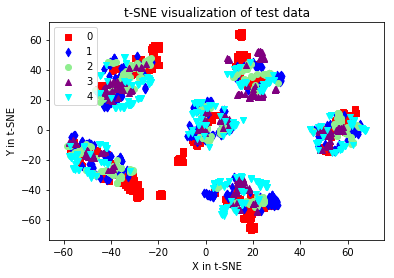

In [10]:
# scatter plot the sample points among 5 classes
markers=('s', 'd', 'o', '^', 'v')
color_map = {0:'red', 1:'blue', 2:'lightgreen', 3:'purple', 4:'cyan'}
plt.figure()
for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test_2d[y_test==cl,0], y=x_test_2d[y_test==cl,1], c=color_map[idx], marker=markers[idx], label=cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()
